## Fish_Species_Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.shape

(159, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### EDA


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

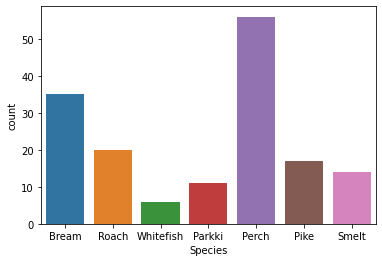

In [7]:
print(data['Species'].value_counts())
sns.countplot(data=data, x=data['Species'])

<AxesSubplot:xlabel='Species', ylabel='Weight'>

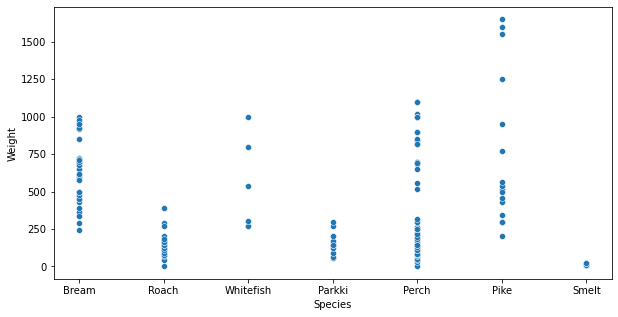

In [8]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x=data['Species'], y=data['Weight'])

<AxesSubplot:xlabel='Species', ylabel='Height'>

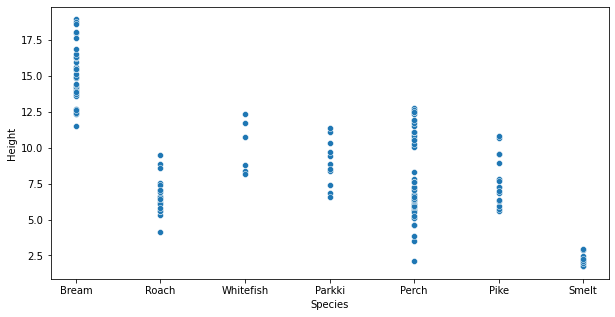

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x=data['Species'], y=data['Height'])

<AxesSubplot:xlabel='Species', ylabel='Width'>

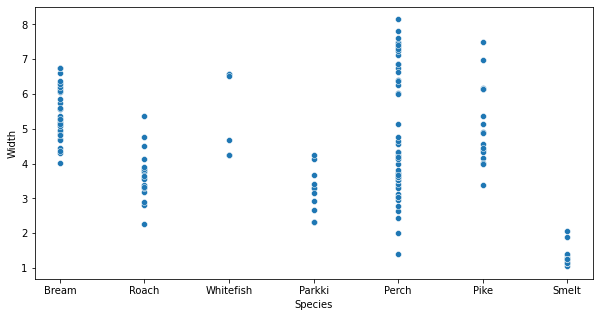

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x=data['Species'], y=data['Width'])

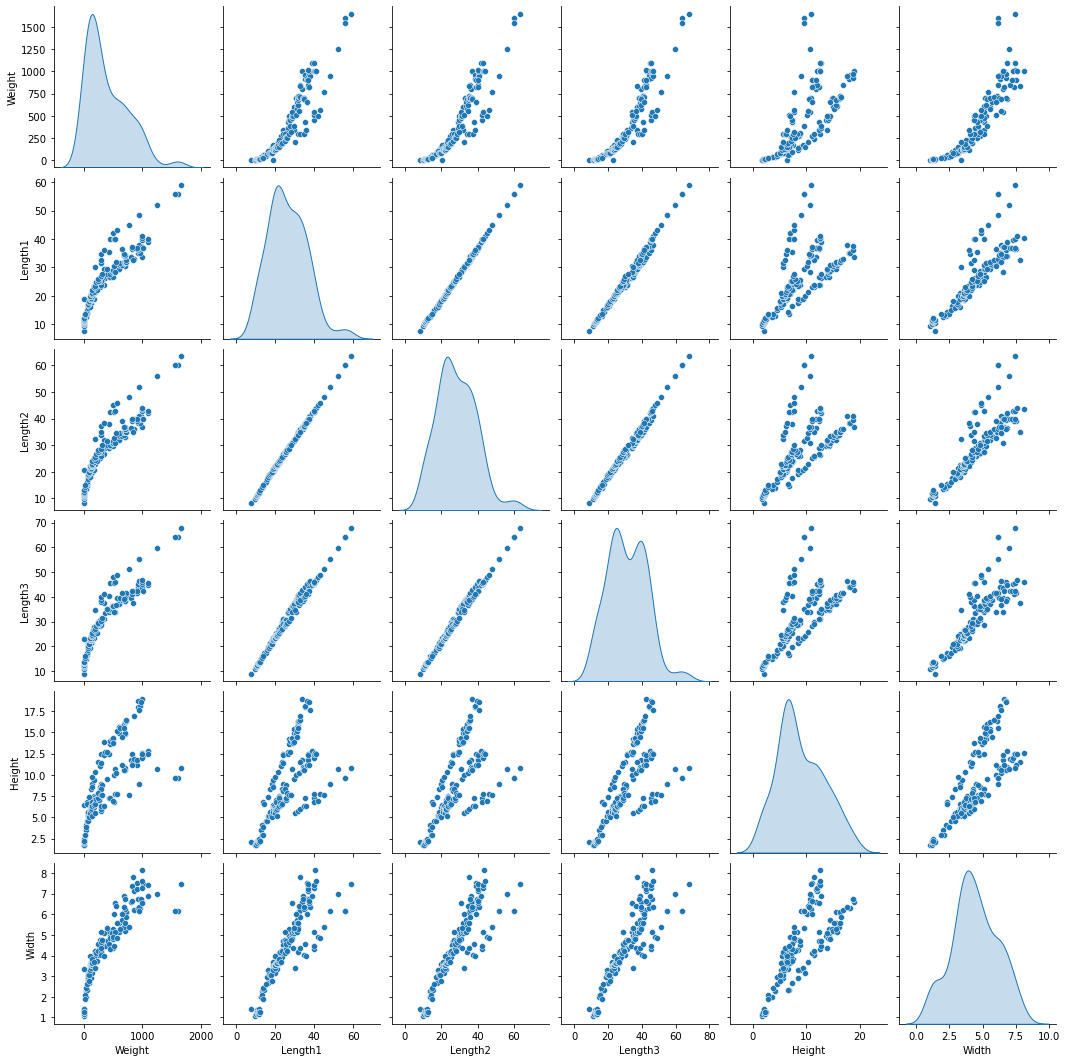

In [11]:
sns.pairplot(data, diag_kind='kde')

### Train_Test_Split

In [12]:
X = data.drop('Species', axis=1)
y = data['Species']

In [13]:
print(X.shape)
print(y.shape)

(159, 6)
(159,)


In [14]:
# assigning the values to the 'Species'

In [15]:
data['Species']= data['Species'].replace({'Perch' : "1",'Bream' : '2','Roach' : '3',
                                          'Pike' : '4', 'Smelt' : '5','Parkki' : '6', 'Whitefish' : '7'})

In [16]:
data['Species'].value_counts()

1    56
2    35
3    20
4    17
5    14
6    11
7     6
Name: Species, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=True)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

Xtrain_scaled = sc.fit_transform(Xtrain)
Xtest_scaled = sc.transform(Xtest)

In [19]:
# Applying Different ML algorithm

### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [21]:
ypred1 = clf.predict(Xtest)

In [22]:
ypred1

array(['2', '1', '2', '1', '1', '2', '1', '2', '5', '3', '1', '1', '6',
       '1', '1', '3', '6', '1', '1', '1', '5', '6', '1', '2', '1', '2',
       '2', '5', '4', '1', '1', '1'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy_score(ytest, ypred1)

0.6875

In [24]:
precision_score(ytest, ypred1, average='weighted')

D:\Bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6028645833333333

In [25]:
recall_score(ytest, ypred1, average='weighted')

0.6875

In [26]:
f1_score(ytest, ypred1, average='weighted')

0.6364583333333333

In [27]:
confusion_matrix(ytest, ypred1)

array([[11,  0,  2,  0,  0,  1,  0],
       [ 0,  7,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(Xtrain, ytrain)

RandomForestClassifier()

In [29]:
ypred2 = rfc.predict(Xtrain)

In [30]:
ypred2

array(['1', '4', '7', '1', '3', '6', '2', '7', '4', '1', '1', '5', '2',
       '1', '1', '2', '3', '1', '4', '2', '1', '5', '2', '1', '2', '3',
       '1', '2', '3', '4', '3', '3', '1', '5', '5', '5', '1', '2', '1',
       '1', '2', '2', '1', '6', '7', '1', '1', '3', '6', '1', '1', '1',
       '1', '1', '2', '2', '2', '4', '3', '1', '1', '5', '2', '2', '6',
       '2', '4', '1', '1', '4', '1', '1', '5', '1', '6', '2', '1', '3',
       '1', '1', '3', '2', '1', '3', '1', '2', '5', '1', '5', '3', '2',
       '6', '2', '5', '2', '5', '1', '1', '2', '7', '4', '2', '7', '2',
       '6', '6', '2', '5', '1', '1', '6', '3', '4', '4', '1', '2', '2',
       '4', '6', '4', '4', '1', '4', '4', '1', '4', '3'], dtype=object)

In [31]:
accuracy_score(ytrain, ypred2)

1.0

In [32]:
precision_score(ytrain, ypred2, average='weighted')

1.0

In [33]:
recall_score(ytrain, ypred2, average='weighted')

1.0

In [34]:
f1_score(ytrain, ypred2, average='weighted')

1.0

In [35]:
confusion_matrix(ytrain, ypred2)

array([[42,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  5]], dtype=int64)

### Support Vector Machines (SVM) 

In [36]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=42)

svm.fit(Xtrain, ytrain)

SVC(C=1, kernel='linear', random_state=42)

In [37]:
ypred3 = svm.predict(Xtest)

In [38]:
ypred3

array(['2', '3', '2', '1', '1', '2', '3', '2', '5', '1', '1', '1', '1',
       '1', '7', '1', '6', '7', '1', '1', '5', '1', '3', '2', '1', '2',
       '2', '5', '4', '1', '1', '1'], dtype=object)

In [39]:
accuracy_score(ytest, ypred3)

0.90625

In [40]:
precision_score(ytest, ypred3, average='weighted')

0.934375

In [41]:
recall_score(ytest, ypred3, average='weighted')

0.90625

In [42]:
f1_score(ytest, ypred3, average='weighted')

0.8994971264367817

In [43]:
confusion_matrix(ytest, ypred3)

array([[14,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1]], dtype=int64)

### K-Nearest Neighbors (KNN) 

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [45]:
ypred4 = knn.predict(Xtest)

In [46]:
ypred4

array(['1', '1', '2', '1', '1', '2', '3', '2', '5', '3', '1', '3', '5',
       '1', '1', '1', '1', '2', '1', '1', '5', '1', '1', '2', '1', '2',
       '1', '5', '4', '3', '1', '1'], dtype=object)

In [47]:
accuracy_score(ytest, ypred4)

0.59375

In [48]:
precision_score(ytest, ypred4, average='weighted')

D:\Bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5490196078431373

In [49]:
recall_score(ytest, ypred4, average='weighted')

0.59375

In [50]:
f1_score(ytest, ypred4, average='weighted')

0.5609439619520263

In [51]:
confusion_matrix(ytest, ypred4)

array([[10,  0,  3,  0,  1,  0,  0],
       [ 2,  5,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0]], dtype=int64)

### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(Xtrain, ytrain)

GaussianNB()

In [53]:
ypred5 = nb.predict(Xtest)

In [54]:
ypred5

array(['2', '3', '2', '3', '3', '2', '3', '2', '3', '3', '3', '3', '1',
       '1', '2', '3', '6', '7', '7', '3', '5', '1', '3', '2', '3', '2',
       '2', '5', '4', '3', '1', '1'], dtype='<U1')

In [55]:
accuracy_score(ytest, ypred5)

0.59375

In [56]:
precision_score(ytest, ypred5, average='weighted')

0.7240985576923078

In [57]:
recall_score(ytest, ypred5, average='weighted')

0.59375

In [58]:
f1_score(ytest, ypred5, average='weighted')

0.5923245614035088

In [59]:
confusion_matrix(ytest, ypred5)

array([[4, 0, 9, 0, 0, 0, 1],
       [0, 7, 0, 0, 0, 0, 0],
       [1, 0, 4, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]], dtype=int64)